In [1]:
import numpy as np
import pylab as plt
import pickle
import os,sys
import pandas as pd
from collections import Counter

%matplotlib inline  
%load_ext autoreload
%autoreload 2

In [2]:
pd.set_option('display.max_rows', 10)

In [3]:
path_data = os.path.abspath(os.path.join(os.pardir,'data'))
print(path_data)

/DRIVE/REPOS/wos-text-dynamics/data


In [4]:
def moving_window(x_,s_):
    n_ = len(x_)
    x_new_ = []
    for i_ in range(n_-s_):
        x_new_ += [np.mean( x_[i_:i_+s_] )]
    return np.array(x_new_)

# results of some set of categories compiled by Jared

In [5]:
fname_data = 'bycat-results.pkl'
with open(os.path.join(path_data,fname_data),'rb') as f:
    x=pickle.load(f,encoding='latin-1')

In [6]:
len(x)

220

In [7]:
list_cats = list(x.keys())

In [8]:
cat_ = list_cats[0]
print(cat_)

Computer Science, Hardware & Architecture


In [9]:
s = 5

[  811861.    866836.6   919971.2   973450.4  1017122.6  1054779.4
  1086111.8  1117683.4  1168237.4  1222245.6  1286521.4  1363570.6
  1445714.   1522826.6  1607586.   1687124.   1774319.2  1863095.2
  1952665.2  2037676.2]


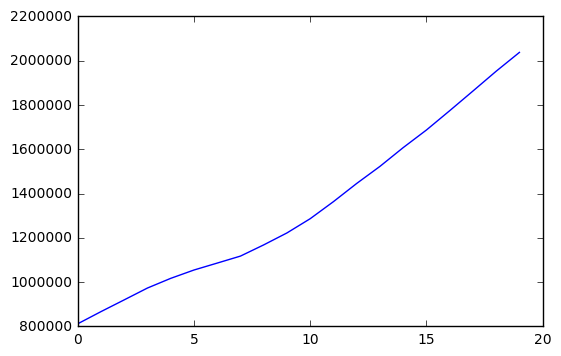

In [10]:
n_pubs_tot_ = np.zeros(25-s)#x[cat_]
for cat_ in list_cats:
    n_pubs_tot_ += moving_window(x[cat_]['n_pubs'],s)
print(n_pubs_tot_)
plt.plot(n_pubs_tot_)

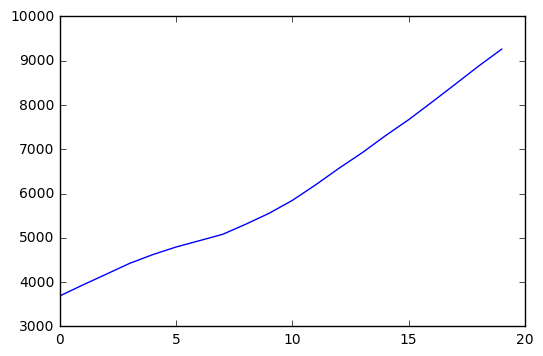

In [11]:
plt.plot(n_pubs_tot_/len(list_cats))

## Looking at the number of publications

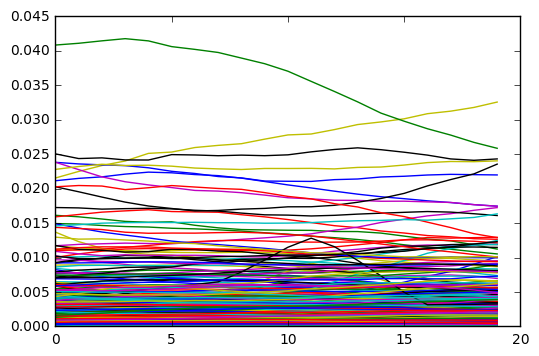

In [12]:
for cat_ in list_cats:
    p_pubs_= moving_window(x[cat_]['n_pubs'],s)/n_pubs_tot_
    plt.plot(p_pubs_)

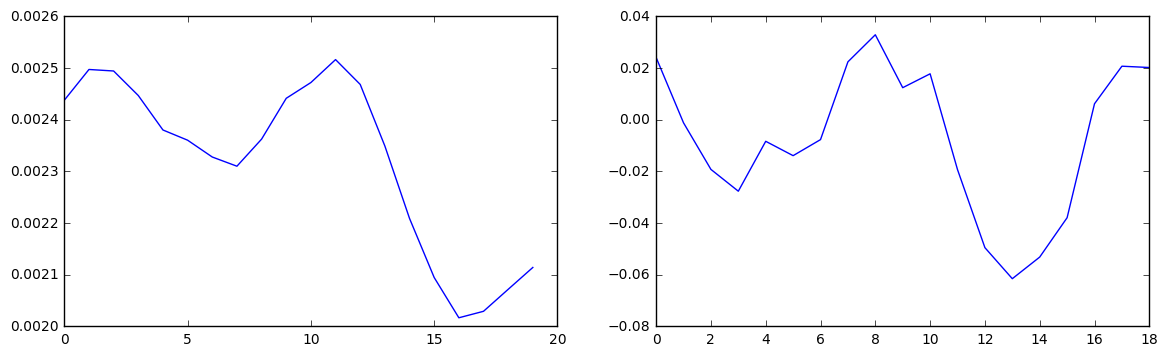

In [13]:
cat_ = list_cats[0]
p_pubs_ = moving_window(x[cat_]['n_pubs'],s)/n_pubs_tot_
growth_rate_ = np.log( p_pubs_[1:]/p_pubs_[:-1]  )
plt.figure(figsize = (14,4))
plt.subplot(121)
plt.plot(p_pubs_)
plt.subplot(122)
plt.plot(growth_rate_)

In [14]:
np.mean(growth_rate_)

-0.0074976389485898014

In [15]:
list_growth_rate_avg = []
for cat_ in list_cats:
    p_pubs_ = moving_window(x[cat_]['n_pubs'],s)/n_pubs_tot_
    growth_rate_ = np.log( p_pubs_[1:]/p_pubs_[:-1]  )
    list_growth_rate_avg += [np.mean(growth_rate_)]

(-0.1, 0.1)

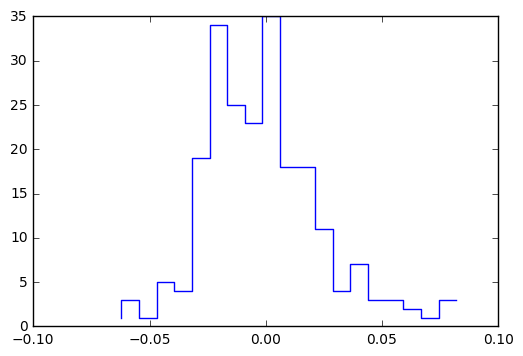

In [16]:
h,bins = np.histogram(list_growth_rate_avg,bins=20)
plt.step(bins[:-1],h)
plt.xlim(-0.1,0.1)

In [17]:
list_growth_rate_avg_indsort = np.argsort(list_growth_rate_avg)

In [18]:
n_sel = 5


### the fields that declined the most

Psychology, Psychoanalysis -0.0621017307208
Language & Linguistics -0.054161400055
Psychology, Mathematical -0.051018589033
Psychology, Educational -0.0475167995088
Microscopy -0.0443212084071


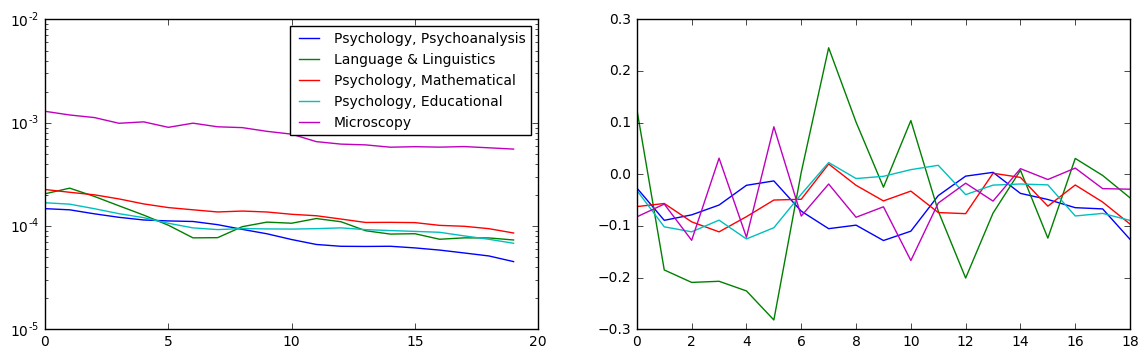

In [19]:
plt.figure(figsize=(14,4))

inds_min = list_growth_rate_avg_indsort[:n_sel]
for ind_ in inds_min:
    cat_ = list_cats[ind_]
    print(cat_,list_growth_rate_avg[ind_])
    p_pubs_ = moving_window(x[cat_]['n_pubs'],s)/n_pubs_tot_
    growth_rate_ = np.log( p_pubs_[1:]/p_pubs_[:-1]  )
    
    plt.subplot(121)
    plt.plot(p_pubs_,label = cat_)
    plt.subplot(122)
    plt.plot(growth_rate_)
plt.subplot(121)
plt.yscale('log')
plt.legend(loc='upper right',fontsize=10)
plt.subplot(122)


### the fields that increased the most

Integrative & Complementary Medicine 0.0894387563963
Nanoscience & Nanotechnology 0.086126607405
Medical Ethics 0.0844430560621
Transportation 0.0785807623978
Women's Studies 0.0711742319586


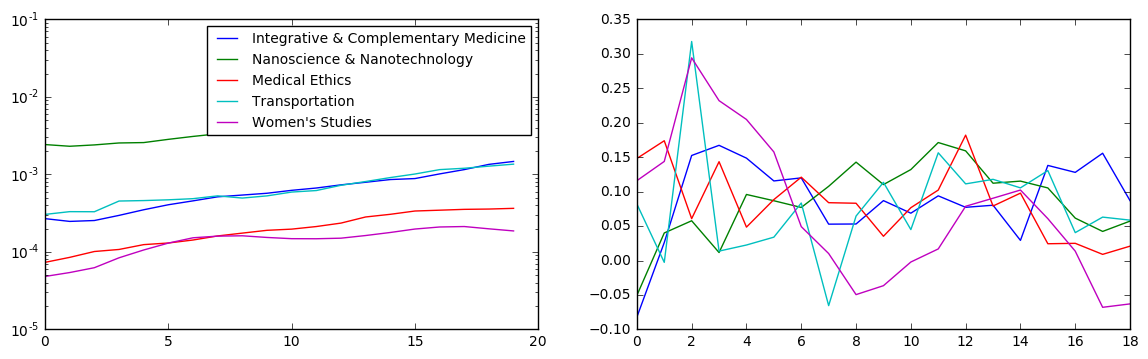

In [20]:
plt.figure(figsize=(14,4))

inds_max = list_growth_rate_avg_indsort[-n_sel:]
for ind_ in inds_max[::-1]:
    cat_ = list_cats[ind_]
    print(cat_,list_growth_rate_avg[ind_])
    p_pubs_ = moving_window(x[cat_]['n_pubs'],s)/n_pubs_tot_
    growth_rate_ = np.log( p_pubs_[1:]/p_pubs_[:-1]  )
    plt.subplot(121)
    plt.plot(p_pubs_,label = cat_)
    plt.subplot(122)
    plt.plot(growth_rate_)
plt.subplot(121)
plt.yscale('log')
plt.legend(loc='upper right',fontsize=10)
plt.subplot(122)

## TODO: 
- Look at JSD-change
- Entropy change